In [1]:
# importing requred library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Importing dataset.
df = pd.read_csv("Dataset/health care diabetes.csv")

### Data Exploration
#### Performed  descriptive analysis. Understood the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing values

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Visually explored  variables using histograms

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- As we can see there is no null values.

Glucose


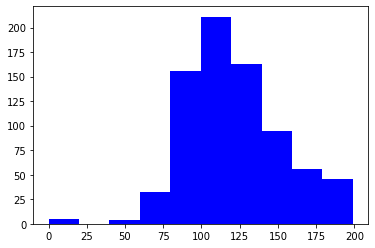

BloodPressure


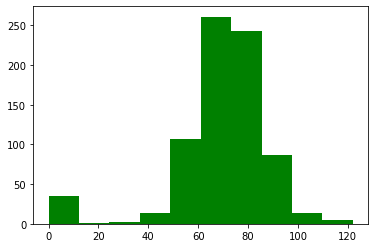

SkinThickness


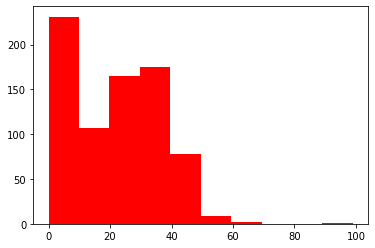

Insulin


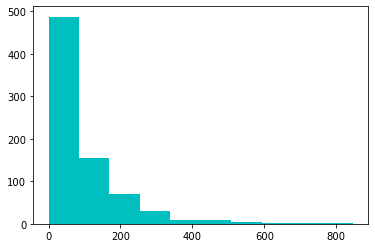

BMI


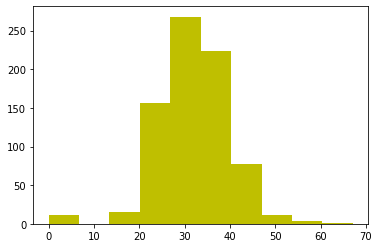

In [8]:
x = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
color = ['b','g','r','c','y']
for (i,j) in zip(x,color):
    print(i)
    plt.hist(df[i],color=j,bins =10)
    plt.show()

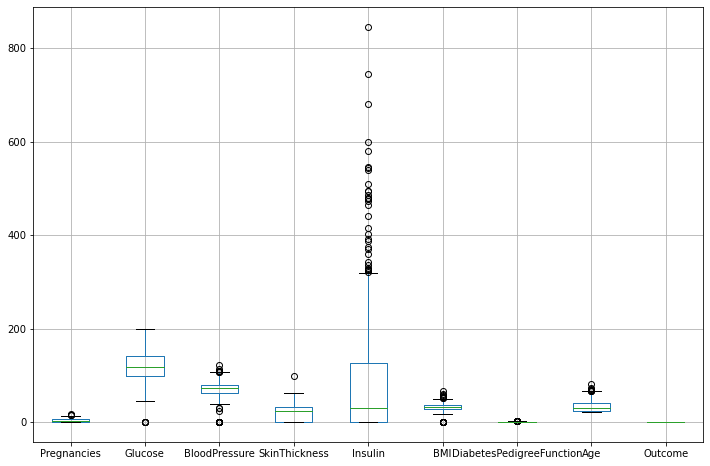

In [9]:
plt.figure(figsize=(12,8))
df.boxplot();

- We have to consider '0' as a null value.

In [10]:
for i in ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]:
    print(i)
    print(df[i].value_counts()[0])

Glucose
5
BloodPressure
35
SkinThickness
227
Insulin
374
BMI
11


- Repalcing '0' with median .

In [11]:
for i in["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]:
    print(i)
    median_value=df[df[i]!=0][i].median()
    print(median_value)
    df[i].replace(0,median_value,inplace=True)

Glucose
117.0
BloodPressure
72.0
SkinThickness
29.0
Insulin
125.0
BMI
32.3


In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
df.dtypes.value_counts()

int64      7
float64    2
dtype: int64

Pregnancies
1    135
0    111
2    103
3     75
4     68
Name: Pregnancies, dtype: int64


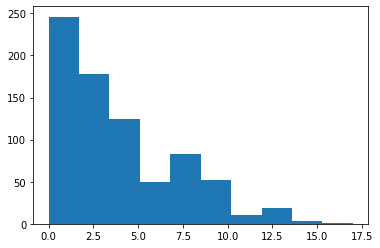

Glucose
99     17
100    17
117    16
129    14
125    14
Name: Glucose, dtype: int64


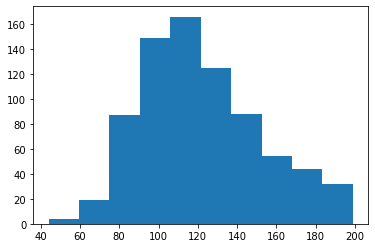

BloodPressure
72    79
70    57
74    52
78    45
68    45
Name: BloodPressure, dtype: int64


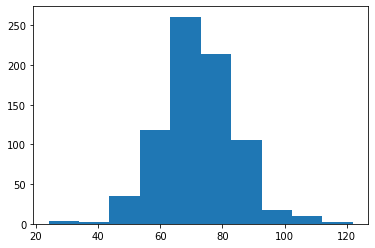

SkinThickness
29    244
32     31
30     27
27     23
23     22
Name: SkinThickness, dtype: int64


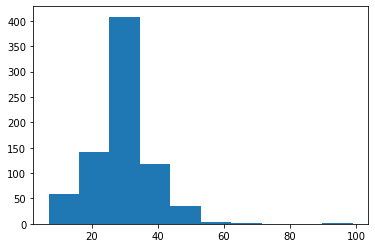

Insulin
125    378
105     11
130      9
140      9
120      8
Name: Insulin, dtype: int64


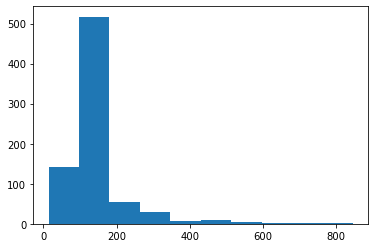

BMI
32.3    14
32.0    13
31.6    12
31.2    12
33.3    10
Name: BMI, dtype: int64


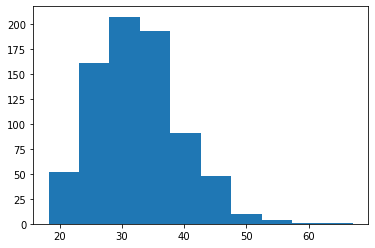

DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
Name: DiabetesPedigreeFunction, dtype: int64


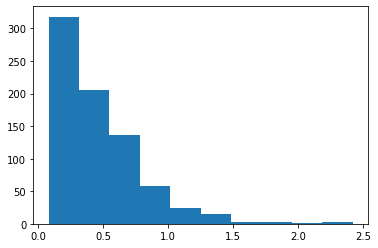

Age
22    72
21    63
25    48
24    46
23    38
Name: Age, dtype: int64


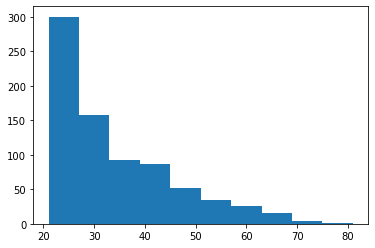

Outcome
0    500
1    268
Name: Outcome, dtype: int64


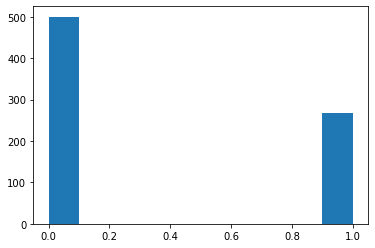

In [14]:
for i in df:
    print(i)
    print(df[i].value_counts().head())
    plt.hist(df[i])
    plt.show()



### Checked the balance of the data by plotting the count of outcomes by their value.

In [15]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<BarContainer object of 2 artists>

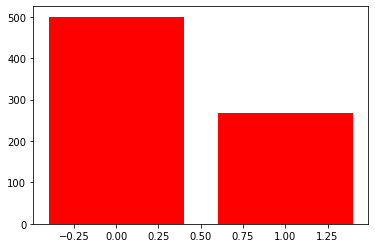

In [16]:
plt.bar([0,1],df.Outcome.value_counts(), color="r")

- From above we can infer that the dataset is not balanced. But count of '1' is not that low.

### 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.


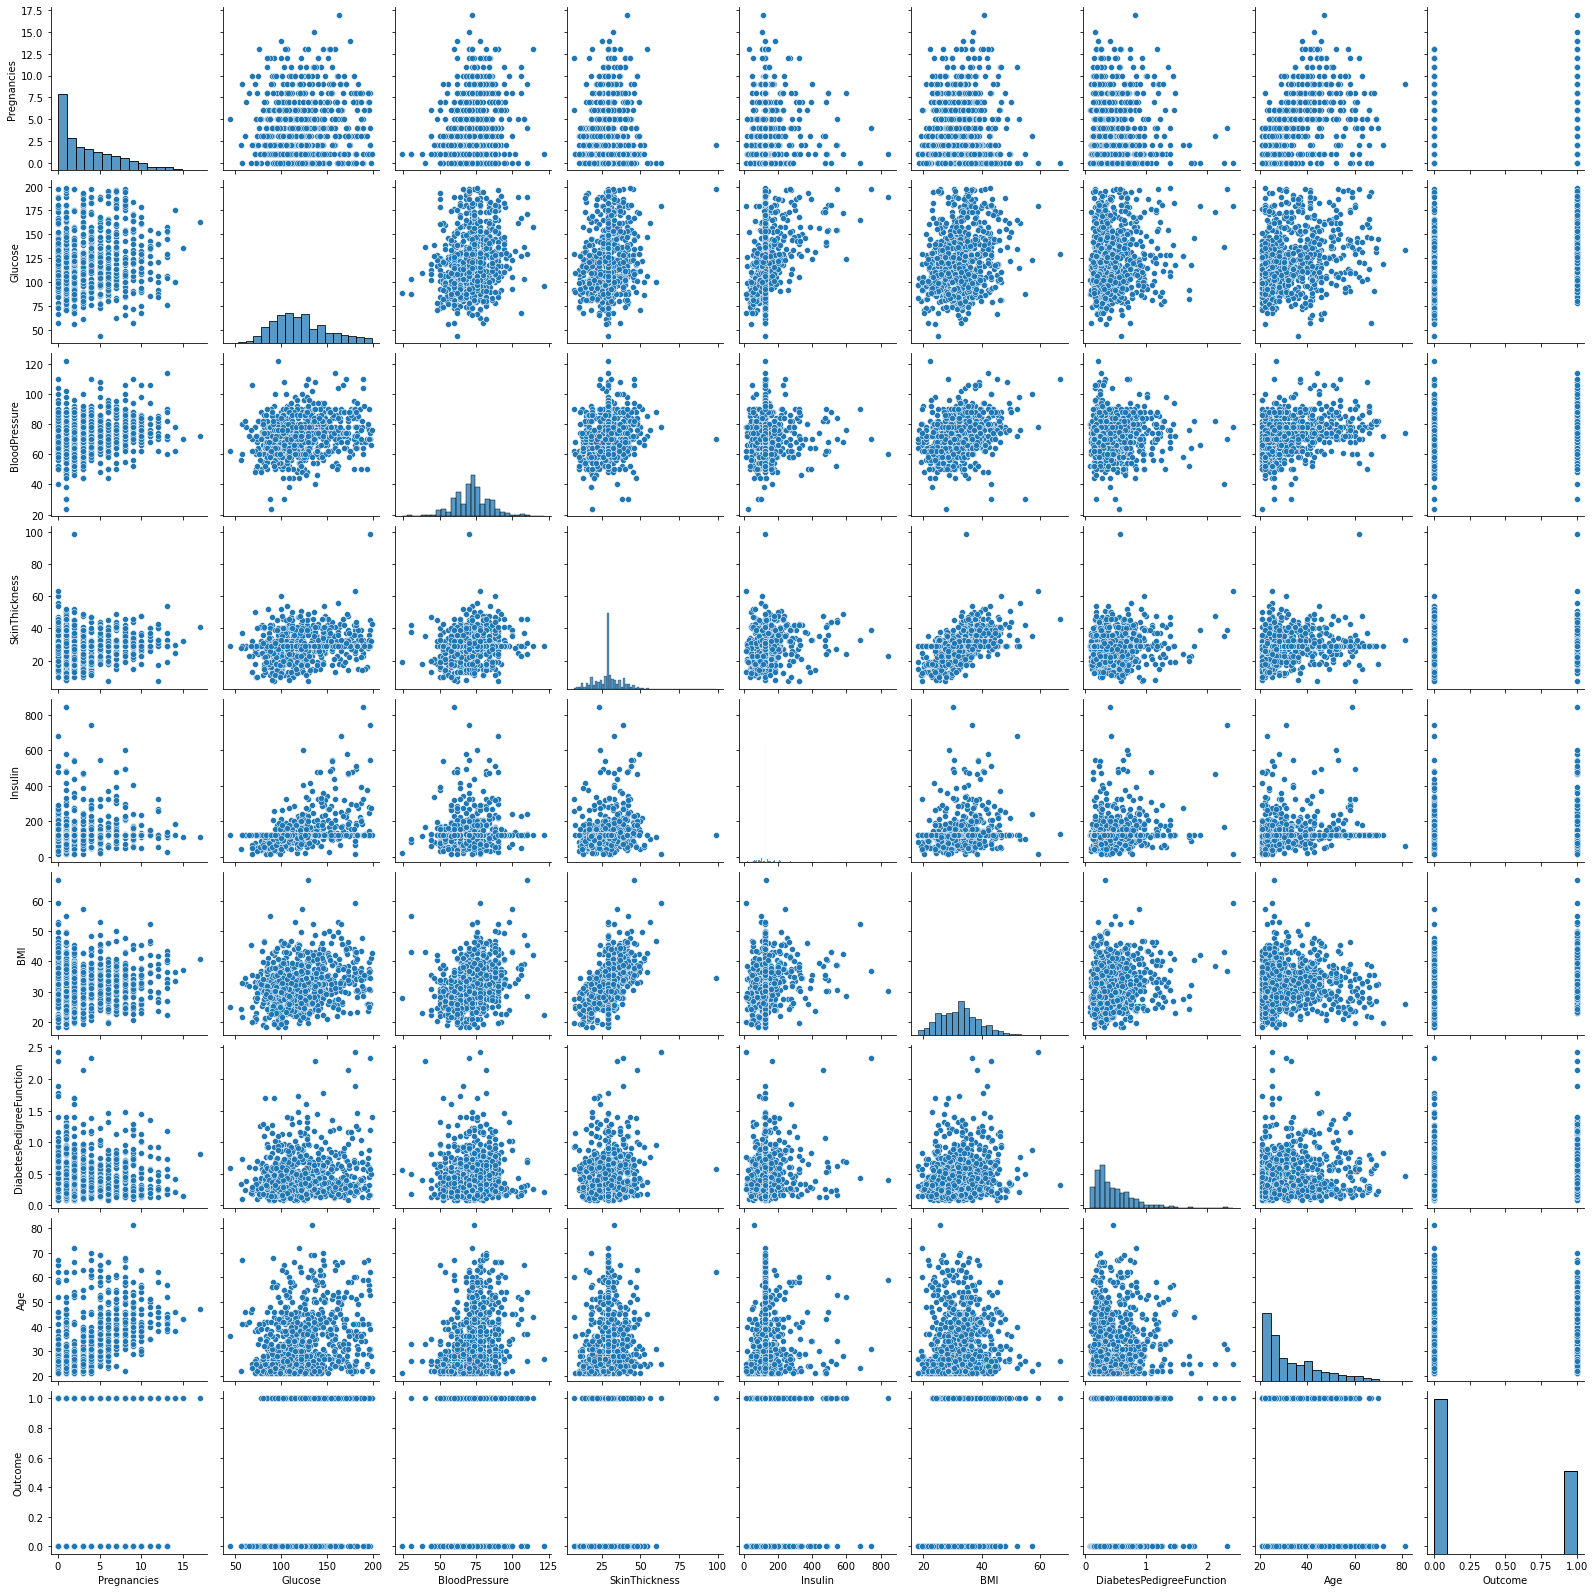

In [17]:
sns.pairplot(df)

C:\Users\ABChattar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

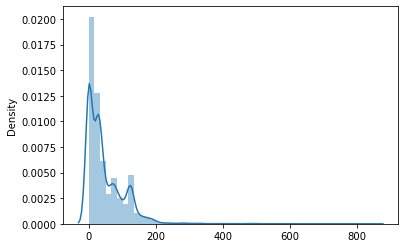

In [18]:
sns.distplot(df)

In [19]:
BloodPressure = df['BloodPressure']
Glucose = df['Glucose']
SkinThickness = df['SkinThickness']
Insulin = df['Insulin']
BMI = df['BMI']

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

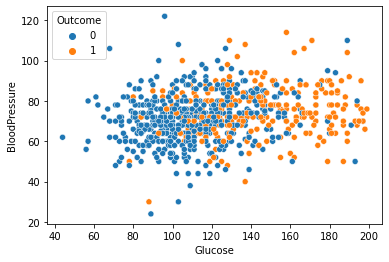

In [20]:
sns.scatterplot(x= "Glucose" ,y= "BloodPressure", hue="Outcome", data=df)

<AxesSubplot:xlabel='BMI', ylabel='Insulin'>

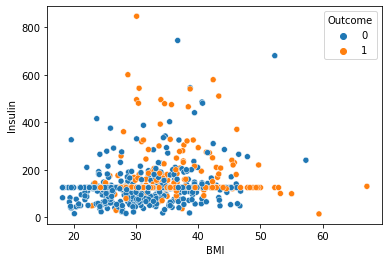

In [21]:
sns.scatterplot(x= "BMI" ,y= "Insulin",hue="Outcome", data=df)

<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

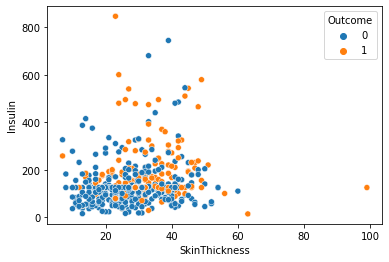

In [22]:
sns.scatterplot(x= "SkinThickness" ,y= "Insulin",hue="Outcome", data=df)

### 3. Perform correlation analysis. Visually explore it using a heat map.

<AxesSubplot:>

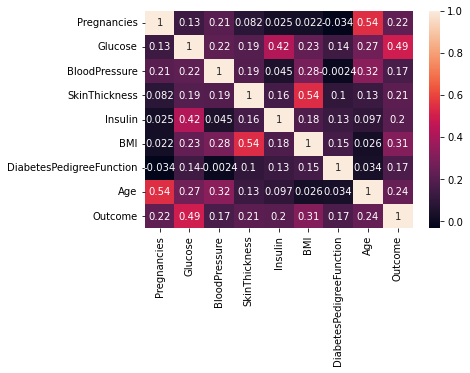

In [23]:
sns.heatmap(df.corr(),annot=True)

# Project Task: Week 3
## Data Modeling:
### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.


In [24]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [25]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=20, random_state=21, stratify=y)

In [27]:
final_output = pd.DataFrame()
final_output['Actual Output'] = y_test


###  KNN Classifier

In [28]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
y_pred_knn =knn_model.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.83      0.71      0.77         7

    accuracy                           0.85        20
   macro avg       0.85      0.82      0.83        20
weighted avg       0.85      0.85      0.85        20



In [31]:
print("The Prediction accuracy of the KNN model on testing data is:  ")
print(accuracy_score(y_test , y_pred_knn)) 

The Prediction accuracy of the KNN model on testing data is:  
0.85


In [32]:
final_output['KNN'] = y_pred_knn

In [33]:
final_output.head()

,Actual Output,KNN
422,0,0
340,0,0
306,1,1
264,1,0
661,1,1


### 2. Decision Tree Classifier

In [34]:
dt_model = DecisionTreeClassifier(max_depth = 3)
dt_model.fit(X_train,y_train)
y_pred_DTC = dt_model.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred_DTC))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.43      0.60         7

    accuracy                           0.80        20
   macro avg       0.88      0.71      0.73        20
weighted avg       0.85      0.80      0.77        20



In [36]:
accuracy = accuracy_score(y_test, y_pred_DTC)
print("The Prediction accuracy of the Decision Tree model on testing data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on testing data is:  0.8


In [37]:
final_output['Decision Tree'] = y_pred_DTC
final_output.head()

,Actual Output,KNN,Decision Tree
422,0,0,0
340,0,0,0
306,1,1,0
264,1,0,0
661,1,1,1


###  Naive Bayes Classifier - Gaussian NB

In [38]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.57      0.73         7

    accuracy                           0.85        20
   macro avg       0.91      0.79      0.81        20
weighted avg       0.88      0.85      0.84        20



In [40]:
accuracy = accuracy_score(y_test, y_pred_gnb)
print("The Prediction accuracy of the Gaussian NB model on testing data is: " , accuracy)

The Prediction accuracy of the Gaussian NB model on testing data is:  0.85


In [41]:
final_output['Naive Bayes'] = y_pred_gnb
final_output.head()

,Actual Output,KNN,Decision Tree,Naive Bayes
422,0,0,0,0
340,0,0,0,0
306,1,1,0,1
264,1,0,0,0
661,1,1,1,1


### Logistic Regression

In [42]:
logreg_model = LogisticRegression( solver = "newton-cg")
logreg_model.fit(X_train, y_train)
y_pred_LG = logreg_model.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred_LG))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.57      0.73         7

    accuracy                           0.85        20
   macro avg       0.91      0.79      0.81        20
weighted avg       0.88      0.85      0.84        20



In [44]:
accuracy = accuracy_score(y_test, y_pred_LG)
print("The Prediction accuracy of the Logistic Regression model on testing data is: " , accuracy)

The Prediction accuracy of the Logistic Regression model on testing data is:  0.85


In [45]:
final_output['Logistic Regression'] = y_pred_LG
final_output.head()

,Actual Output,KNN,Decision Tree,Naive Bayes,Logistic Regression
422,0,0,0,0,0
340,0,0,0,0,0
306,1,1,0,1,1
264,1,0,0,0,0
661,1,1,1,1,1


###  Random Forest Classifier

In [46]:
rfc_model = RandomForestClassifier(n_estimators = 15)
rfc_model.fit(X_train, y_train)
y_pred_RFC = rfc_model.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.80      0.57      0.67         7

    accuracy                           0.80        20
   macro avg       0.80      0.75      0.76        20
weighted avg       0.80      0.80      0.79        20



In [48]:
print("Accuracy score of RFC model on test dataset is : ")
print(accuracy_score(y_test, y_pred_RFC))

Accuracy score of RFC model on test dataset is : 
0.8


In [49]:
final_output['Random Forest'] = y_pred_RFC
final_output.head()

,Actual Output,KNN,Decision Tree,Naive Bayes,Logistic Regression,Random Forest
422,0,0,0,0,0,0
340,0,0,0,0,0,0
306,1,1,0,1,1,1
264,1,0,0,0,0,1
661,1,1,1,1,1,1


###  Adaboost Classifier

In [50]:
ada_model = AdaBoostClassifier(n_estimators = 15)
ada_model.fit(X_train , y_train)
y_pred_ada = ada_model.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.80      0.57      0.67         7

    accuracy                           0.80        20
   macro avg       0.80      0.75      0.76        20
weighted avg       0.80      0.80      0.79        20



In [52]:
print("Accuracy score of the AdaBoost model on test dataset is : ")
print(accuracy_score(y_test, y_pred_ada))

Accuracy score of the AdaBoost model on test dataset is : 
0.8


In [53]:
final_output['AdaBoost'] = y_pred_ada
final_output.head()

,Actual Output,KNN,Decision Tree,Naive Bayes,Logistic Regression,Random Forest,AdaBoost
422,0,0,0,0,0,0,0
340,0,0,0,0,0,0,0
306,1,1,0,1,1,1,0
264,1,0,0,0,0,1,0
661,1,1,1,1,1,1,1


###  Support Vector Classifier

In [54]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_SVC = svc_model.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.71      0.83         7

    accuracy                           0.90        20
   macro avg       0.93      0.86      0.88        20
weighted avg       0.91      0.90      0.90        20



In [56]:
print("SVC model accuracy on test data is : ")
print(accuracy_score(y_test, y_pred_SVC))

SVC model accuracy on test data is : 
0.9


In [57]:
final_output['Support Vector'] = y_pred_SVC
final_output.head()

,Actual Output,KNN,Decision Tree,Naive Bayes,Logistic Regression,Random Forest,AdaBoost,Support Vector
422,0,0,0,0,0,0,0,0
340,0,0,0,0,0,0,0,0
306,1,1,0,1,1,1,0,1
264,1,0,0,0,0,1,0,0
661,1,1,1,1,1,1,1,1


### XG Boost Classifier

In [58]:
xgb_clf_model = XGBClassifier(objective = "multi:softmax" , num_class = 5)
xgb_clf_model.fit(X_train , y_train)
y_pred_XGB = xgb_clf_model.predict(X_test)

[11:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ABChattar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [59]:
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.71      0.83         7

    accuracy                           0.90        20
   macro avg       0.93      0.86      0.88        20
weighted avg       0.91      0.90      0.90        20



In [60]:
print("The testing accuracy of the xgb model is :")
print(accuracy_score(y_test, y_pred_XGB))

The testing accuracy of the xgb model is :
0.9


In [61]:
final_output['XG Boost'] = y_pred_XGB
final_output

,Actual Output,KNN,Decision Tree,Naive Bayes,Logistic Regression,Random Forest,AdaBoost,Support Vector,XG Boost
422,0,0,0,0,0,0,0,0,0
340,0,0,0,0,0,0,0,0,0
306,1,1,0,1,1,1,0,1,1
264,1,0,0,0,0,1,0,0,1
661,1,1,1,1,1,1,1,1,1
565,0,0,0,0,0,0,0,0,0
492,0,0,0,0,0,0,0,0,0
637,0,0,0,0,0,0,0,0,0
305,0,0,0,0,0,0,0,0,0
184,0,1,0,0,0,1,1,0,0



### Data Modeling
####  Created a classification report by analyzing sensitivity, specificity, AUC (ROC curve)

In [62]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_knn[:,], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_DTC[:,], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_gnb[:,], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_LG[:,], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_pred_RFC[:,], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, y_pred_ada[:,], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, y_pred_SVC[:,], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, y_pred_XGB[:,], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [63]:
# auc scores
auc_score1 = roc_auc_score(y_test, y_pred_knn[:,])
auc_score2 = roc_auc_score(y_test, y_pred_DTC[:,])
auc_score3 = roc_auc_score(y_test, y_pred_gnb[:,])
auc_score4 = roc_auc_score(y_test, y_pred_LG[:,])
auc_score5 = roc_auc_score(y_test, y_pred_RFC[:,])
auc_score6 = roc_auc_score(y_test, y_pred_ada[:,])
auc_score7 = roc_auc_score(y_test, y_pred_SVC[:,])
auc_score8 = roc_auc_score(y_test, y_pred_XGB[:,])


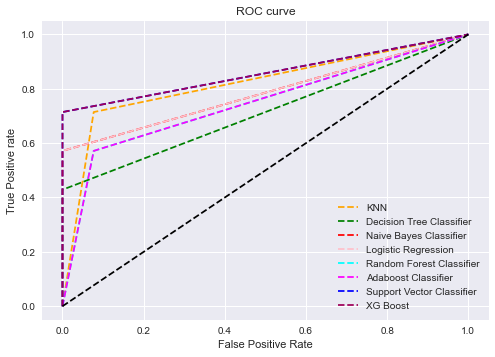

In [64]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Naive Bayes Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='pink', label='Logistic Regression')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='Random Forest Classifier')
plt.plot(fpr6, tpr6, linestyle='--',color='magenta', label='Adaboost Classifier')
plt.plot(fpr7, tpr7, linestyle='--',color='blue', label='Support Vector Classifier')
plt.plot(fpr8, tpr8, linestyle='--',color='#9e0059', label='XG Boost')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=2000)
plt.show();

#### From the above we can infer that 
- **'Logistic Regression'** and **'Naive Bayes Classifier'** has same curve.
- **'XG Boost'** , **'Support Vector Classifier'** and **'Random Forest Classifier'** has same curve.


#### Saving CSV file for tableau without missing or null values.

In [65]:
df.to_csv('health care diabetes new.csv')